In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
iris_data = pd.read_csv("./iris-project.zip")

In [3]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_data = iris_data.drop(iris_data.index[0])

print(type(iris_data))
iris_data.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
iris_data['species'] = np.where(iris_data['species'] == 'Iris-setosa',0, np.where(iris_data['species'] == 'Iris-versicolor',1,2))

In [6]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


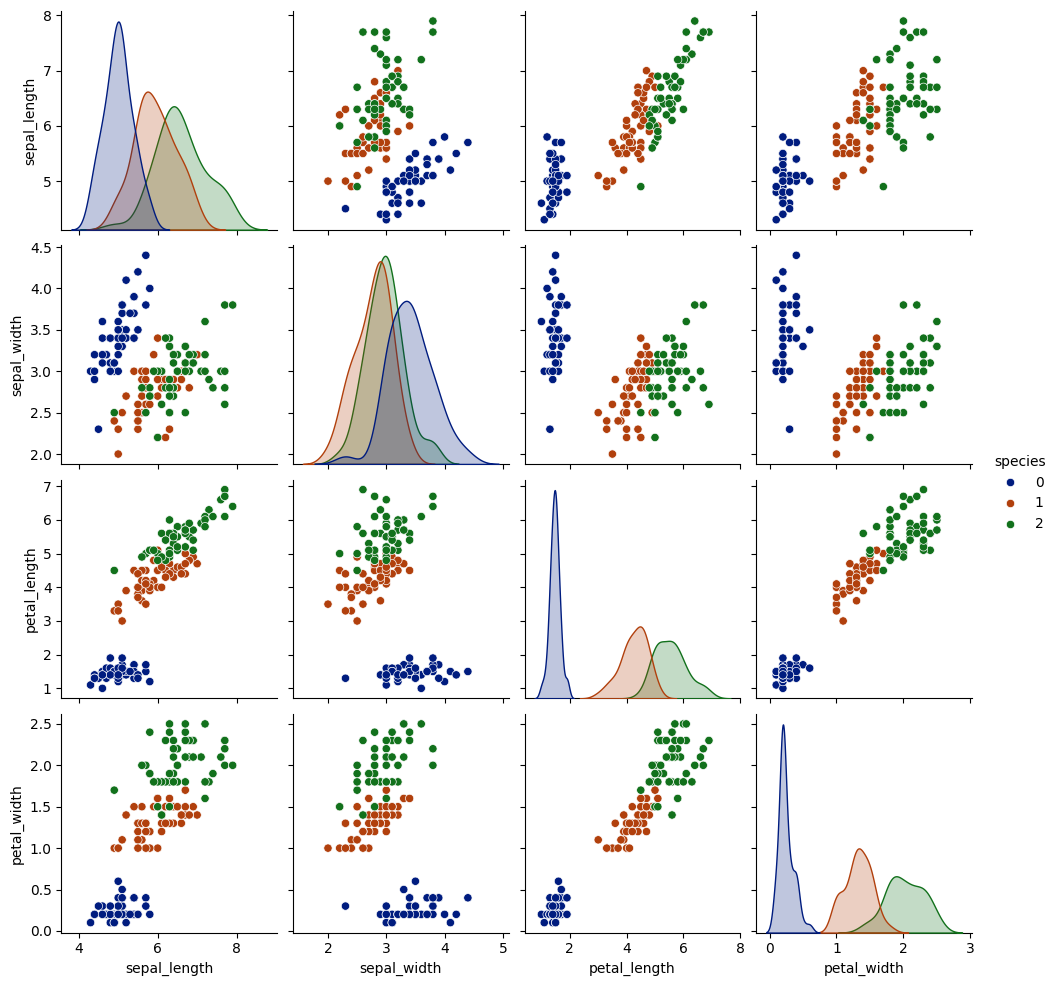

In [7]:
sns.pairplot(iris_data, hue ="species", palette='dark')
plt.show()

In [8]:
X = iris_data.drop("species",axis=1)
y = iris_data["species"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3 , stratify=y,  random_state=42)

In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [14]:
X_test.tail()

,sepal_length,sepal_width,petal_length,petal_width
53,5.5,2.3,4.0,1.3
141,6.9,3.1,5.1,2.3
104,6.5,3.0,5.8,2.2
148,6.2,3.4,5.4,2.3
132,6.4,2.8,5.6,2.2


In [15]:
y_test.tail()

53     1
141    2
104    2
148    2
132    2
Name: species, dtype: int32

In [19]:
new_data = np.array([[7.3, 3.6, 1.2, 0.3]])

In [20]:
prediction = knn.predict(new_data)
if prediction == [0]:
    print("Iris-Sentosa")
elif prediction == [1]:
    print("Iris-versicolor")
elif prediction == [2]:
    print("Iris-virginica")
else:
    print('Cannot Recognize!!')

Iris-Sentosa


C:\Users\ketan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
